In [2]:
# perform necessary import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [3]:
#Load data
applicant_info = pd.read_csv('train_values.csv')
acceptance_status = pd.read_csv('train_labels.csv')

In [4]:
#Clean up data - application_info
#show the details of the data about duplicates - no duplicates
print(applicant_info.shape)
print(applicant_info.row_id.unique().shape)

(500000, 22)
(500000,)


In [5]:
#Clean up data - acceptance_status
#show the details of the data about duplicates - no duplicates
print(acceptance_status.shape)
print(acceptance_status.row_id.unique().shape)

(500000, 2)
(500000,)


In [6]:
# check for missing values
(applicant_info.astype(np.object).isnull()).any()

row_id                            False
loan_type                         False
property_type                     False
loan_purpose                      False
occupancy                         False
loan_amount                       False
preapproval                       False
msa_md                            False
state_code                        False
county_code                       False
applicant_ethnicity               False
applicant_race                    False
applicant_sex                     False
applicant_income                   True
population                         True
minority_population_pct            True
ffiecmedian_family_income          True
tract_to_msa_md_income_pct         True
number_of_owner-occupied_units     True
number_of_1_to_4_family_units      True
lender                            False
co_applicant                      False
dtype: bool

In [7]:
applicant_info.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
dtype: int64

In [8]:
#Replace missing value with -1
#applicant_info=applicant_info.fillna('-1')
#when you intend to replace with mean of column
applicant_info.fillna(applicant_info.mean(), inplace=True)
#applicant_info=applicant_info.fillna("10")

In [9]:
applicant_info.isnull().sum()

row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
dtype: int64

In [10]:
# check for missing values
(acceptance_status.astype(np.object).isnull()).any()

row_id      False
accepted    False
dtype: bool

In [11]:
#Data type of each column
applicant_info.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
dtype: object

In [12]:
#normailize value due to class imbalance
acceptance_status.accepted.value_counts(normalize=True)

1    0.500228
0    0.499772
Name: accepted, dtype: float64

In [13]:
#merging data set
combined = applicant_info.merge(acceptance_status, on='row_id', how='left')
combined.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369,52,299,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16,10,306,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305,47,180,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24,37,20,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [14]:
combined.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344,0.500228
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,0.677685,147.273425,2666.152767,25.735519,14473.905464,13.887294,720.724311,893.291110,1838.313175,0.500000
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,1.000000,49.000000,3805.000000,11.191000,60071.000000,89.145000,963.000000,1323.000000,2442.000000,0.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,1.000000,79.000000,5099.000000,24.522000,68648.000000,100.000000,1364.000000,1797.000000,3731.000000,1.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,2.000000,112.000000,6379.000000,44.486000,74714.250000,100.000000,1754.000000,2275.000000,5436.000000,1.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000,1.000000


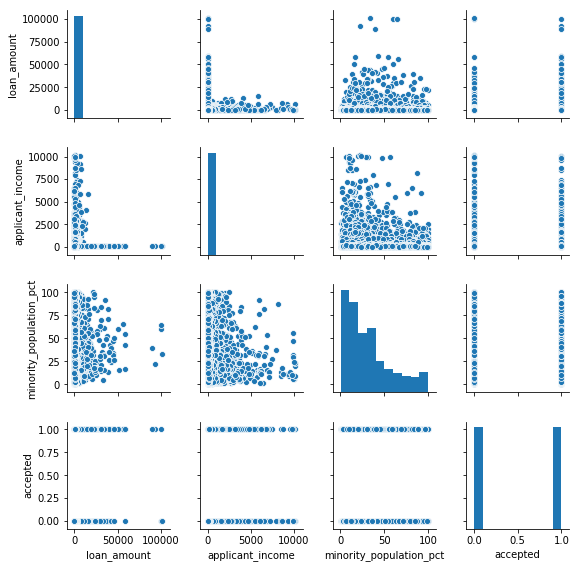

In [18]:
#####################################################################################################
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#Now when creating your session pass this config to it.
sess = tf.Session(config=config)


# Create a scatter plot matrix
%matplotlib inline
import seaborn as sns
num_cols = ["loan_amount", "applicant_income", "minority_population_pct", "accepted"]
sns.pairplot(combined[num_cols], height=2)

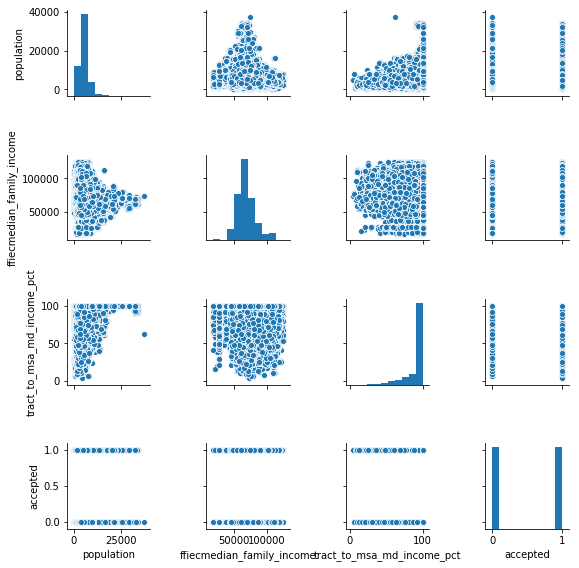

In [19]:
#####################################################################################################
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#Now when creating your session pass this config to it.
sess = tf.Session(config=config)


# Create a scatter plot matrix
%matplotlib inline
import seaborn as sns
num_cols = ["population", "ffiecmedian_family_income", "tract_to_msa_md_income_pct", "accepted"]
sns.pairplot(combined[num_cols], height=2)

In [23]:
import pandas as pd
import numpy as np
new_cols = ["loan_amount", "applicant_income", "population", "minority_population_pct", "ffiecmedian_family_income", "tract_to_msa_md_income_pct", "number_of_owner-occupied_units", "number_of_1_to_4_family_units", "accepted"]
corr = combined[new_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,loan_amount,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,accepted
loan_amount,1,0.168878,9.87771e-05,0.00713407,0.104564,0.0432313,-0.013428,-0.036155,0.0463698
applicant_income,0.168878,1,-0.00653909,-0.0502454,0.10812,0.0952113,0.00429322,-0.0185117,0.0716737
population,9.87771e-05,-0.00653909,1,0.0873828,-0.0143771,0.149653,0.858595,0.816858,0.0187093
minority_population_pct,0.00713407,-0.0502454,0.0873828,1,0.0210591,-0.442764,-0.214351,-0.157961,-0.090724
ffiecmedian_family_income,0.104564,0.10812,-0.0143771,0.0210591,1,-0.0544971,-0.0213879,-0.148223,0.065338
tract_to_msa_md_income_pct,0.0432313,0.0952113,0.149653,-0.442764,-0.0544971,1,0.360464,0.210565,0.0895902
number_of_owner-occupied_units,-0.013428,0.00429322,0.858595,-0.214351,-0.0213879,0.360464,1,0.887242,0.0351728
number_of_1_to_4_family_units,-0.036155,-0.0185117,0.816858,-0.157961,-0.148223,0.210565,0.887242,1,0.00588446
accepted,0.0463698,0.0716737,0.0187093,-0.090724,0.065338,0.0895902,0.0351728,0.00588446,1


In [30]:
#convert categorical feature to scaler
from sklearn.preprocessing import LabelEncoder
var_mod = ['loan_type','occupancy','co_applicant', 'county_code','msa_md','state_code', 'property_type','preapproval', 'applicant_race', 'loan_purpose', 'state_code', 'applicant_sex']

datasetLe = LabelEncoder()
for i in var_mod:
    combined[i] = datasetLe.fit_transform(combined[i].astype(str))

In [97]:
combined['loan_amount_log'] = np.log(combined['loan_amount']) #log function to reduce the extreme effect in Loan amount (which we saw in the previous barplot)
#combined['state_code_log'] = np.log(combined['state_code'])
#combined['msa_md_log'] = np.log(combined['msa_md'])
combined['applicant_income_log'] = np.log(combined['applicant_income'])
combined['population_log'] = np.log(combined['population'])
combined['minority_population_pct_log'] = np.log(combined['minority_population_pct'])
combined['tract_to_msa_md_income_pct_log'] = np.log(combined['tract_to_msa_md_income_pct'])
combined['ffiecmedian_family_income_log'] = np.log(combined['ffiecmedian_family_income'])
#number_of_owner-occupied_units
combined.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                        int64
accepted                            int64
loan_amount_log                   

In [ ]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [45]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy :{0:.3%}".format(accuracy))
    
    kf = KFold(data.shape[0], n_folds=10)
    error = []
    
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 
    return {'accuracy':accuracy ,'cv':np.mean(error)}

In [18]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#Now when creating your session pass this config to it.
sess = tf.Session(config=config)
#number of trees
n_estimators_vector = range(300, 301, 300)

#Minmum split
min_samples_split_vector = range(20, 21, 5)

#Maximum Features
max_features_vector = range(3,4,1)
from sklearn.ensemble import ExtraTreesClassifier

resultCalibrationDF = pd.DataFrame(columns = ['n_estimators', 'min_samples_split', 'max_features','Accuracy', 'Cross-Validation Score'])

outcome_var = 'accepted'
predictor_var = ['preapproval', 'state_code', 'applicant_race', 'loan_purpose', 'loan_amount_log', 'minority_population_pct_log']
#predictor_var = ['minority_population_pct', 'loan_purpose', 'loan_amount_log', 'state_code', 'county_code']

#train the model
for n_estimator in n_estimators_vector:
    for min_samples_split in min_samples_split_vector:
        for max_features in max_features_vector:
            model_etc = ExtraTreesClassifier(n_estimators=n_estimator, min_samples_split=min_samples_split, max_depth=None, max_features=max_features)
            result = classification_model(model_etc, combined,predictor_var,outcome_var)
            #insert result to data frame
            resultCalibrationDF = resultCalibrationDF.append({'n_estimators':n_estimator,'min_samples_split':min_samples_split,'max_features':max_features, 'Accuracy':result['accuracy'], 'Cross-Validation Score':result['cv']}, ignore_index=True)


Accuracy :77.116%
Cross-Validation Score : 63.846%


In [19]:
#333

In [20]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#Now when creating your session pass this config to it.
sess = tf.Session(config=config)

model_etc = ExtraTreesClassifier(n_estimators=300, min_samples_split=20, max_depth=None, max_features=3)
result = classification_model(model_etc, combined,predictor_var,outcome_var)
print("Accuracy : %s" % "{0:.3%}".format(result['accuracy']))
print("Cross-Validation Score : %s" % "{0:.3%}".format(result['cv']))

Accuracy :77.100%
Cross-Validation Score : 63.786%
Accuracy : 77.100%
Cross-Validation Score : 63.786%


In [21]:
#333

In [22]:

# import final test data
final = pd.read_csv('test_values.csv')
print(final.shape)
print(final.row_id.unique().shape)

(500000, 22)
(500000,)


In [23]:
# check for missing values
(final.astype(np.object).isnull()).any()

row_id                            False
loan_type                         False
property_type                     False
loan_purpose                      False
occupancy                         False
loan_amount                       False
preapproval                       False
msa_md                            False
state_code                        False
county_code                       False
applicant_ethnicity               False
applicant_race                    False
applicant_sex                     False
applicant_income                   True
population                         True
minority_population_pct            True
ffiecmedian_family_income          True
tract_to_msa_md_income_pct         True
number_of_owner-occupied_units     True
number_of_1_to_4_family_units      True
lender                            False
co_applicant                      False
dtype: bool

In [24]:
final.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  40141
population                        22480
minority_population_pct           22482
ffiecmedian_family_income         22453
tract_to_msa_md_income_pct        22517
number_of_owner-occupied_units    22574
number_of_1_to_4_family_units     22550
lender                                0
co_applicant                          0
dtype: int64

In [25]:
#Replace missing value with -1
#applicant_info=applicant_info.fillna('-1')
#when you intend to replace with mean of column
final.fillna(applicant_info.mean(), inplace=True)
#applicant_info=applicant_info.fillna("10")

In [26]:
final.isnull().sum()

row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
dtype: int64

In [33]:
final['loan_amount_log'] = np.log(final['loan_amount']) #log function to reduce the extreme effect in Loan amount (which we saw in the previous barplot)
#combined['state_code'] = np.log(combined['state_code'])
#combined['applicant_income_log'] = math.log(combined['applicant_income'])
#final['population_log'] = np.log(final['population'])
final['minority_population_pct_log'] = np.log(final['minority_population_pct'])
final['tract_to_msa_md_income_pct_log'] = np.log(final['tract_to_msa_md_income_pct'])
#final['number__log'] = np.log(final['number_of_owner-occupied_units'])
final.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
loan_amount_log                   float64
minority_population_pct_log       

In [28]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['preapproval', 'state_code', 'applicant_race', 'loan_purpose']
datasetLe = LabelEncoder()
for i in var_mod:
    final[i] = datasetLe.fit_transform(final[i].astype(str))

In [29]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

#####################################################################################################
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#Now when creating your session pass this config to it.
sess = tf.Session(config=config)

predictor_var = ['tract_to_msa_md_income_pct_log','preapproval', 'state_code', 'applicant_race', 'loan_purpose', 'loan_amount_log', 'minority_population_pct_log']
testVectorPrediction = model_etc.predict(final[predictor_var])
testVectorPrediction = datasetLe.inverse_transform(testVectorPrediction)
testDFPrediction = pd.DataFrame(testVectorPrediction, columns=['accepted'], index=final['row_id'].index)
finalResultsDF = pd.concat([final['row_id'], testDFPrediction], axis=1)
#result = classification_model(testVectorPrediction, final,predictor_var,outcome_var)


In [30]:
#export to csv
finalResultsDF.to_csv(path_or_buf='/home/nbuser/library/Capstone Project/SubmissionPrediction_18_5.csv', index=False)

In [100]:
from sklearn.ensemble import AdaBoostClassifier

#number of trees
n_estimators_vector = range(200, 201, 300)

#Minmum split
learning_rate_vector = [0.1]

outcome_var = 'accepted'
resultCalibrationDF = pd.DataFrame(columns = ['n_estimators', 'learning_rate','Accuracy', 'Cross-Validation Score'])

predictor_var = ['tract_to_msa_md_income_pct_log','loan_type','state_code','county_code','property_type', 'preapproval', 'applicant_race', 'loan_purpose', 'loan_amount_log', 'minority_population_pct_log', 'applicant_income_log']

#train the model
for n_estimator in n_estimators_vector:
    for rate in learning_rate_vector:
        modelAdaBoost = AdaBoostClassifier(n_estimators=n_estimator, learning_rate=rate)
        result = classification_model(modelAdaBoost, combined,predictor_var,outcome_var)
        #insert result to data frame
        resultCalibrationDF = resultCalibrationDF.append({'n_estimators':n_estimator, 'learning_rate':rate, 'Accuracy':result['accuracy'], 'Cross-Validation Score':result['cv']}, ignore_index=True)

Accuracy :65.754%
Cross-Validation Score : 65.733%


In [102]:
#resultCalibrationDF.plot(x=['n_estimators', 'learning_rate'], y= ['Accuracy','Cross-Validation Score'], legend = True)


In [103]:
modelAdaBoost = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)
result = classification_model(modelAdaBoost, combined,predictor_var,outcome_var)
print("Accuracy : %s" % "{0:.3%}".format(result['accuracy']))
print("Cross-Validation Score : %s" % "{0:.3%}".format(result['cv']))

Accuracy :64.865%
Cross-Validation Score : 64.846%
Accuracy : 64.865%
Cross-Validation Score : 64.846%


In [104]:

# import final test data
final = pd.read_csv('test_values.csv')
print(final.shape)
print(final.row_id.unique().shape)

(500000, 22)
(500000,)


In [105]:
# check for missing values
(final.astype(np.object).isnull()).any()

row_id                            False
loan_type                         False
property_type                     False
loan_purpose                      False
occupancy                         False
loan_amount                       False
preapproval                       False
msa_md                            False
state_code                        False
county_code                       False
applicant_ethnicity               False
applicant_race                    False
applicant_sex                     False
applicant_income                   True
population                         True
minority_population_pct            True
ffiecmedian_family_income          True
tract_to_msa_md_income_pct         True
number_of_owner-occupied_units     True
number_of_1_to_4_family_units      True
lender                            False
co_applicant                      False
dtype: bool

In [106]:
final.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  40141
population                        22480
minority_population_pct           22482
ffiecmedian_family_income         22453
tract_to_msa_md_income_pct        22517
number_of_owner-occupied_units    22574
number_of_1_to_4_family_units     22550
lender                                0
co_applicant                          0
dtype: int64

In [107]:
#Replace missing value with -1
#applicant_info=applicant_info.fillna('-1')
#when you intend to replace with mean of column
final.fillna(applicant_info.mean(), inplace=True)
#applicant_info=applicant_info.fillna("10")

In [108]:
final['loan_amount_log'] = np.log(final['loan_amount']) #log function to reduce the extreme effect in Loan amount (which we saw in the previous barplot)
#combined['state_code'] = np.log(combined['state_code'])
final['applicant_income_log'] = np.log(combined['applicant_income'])
final['population_log'] = np.log(final['population'])
final['minority_population_pct_log'] = np.log(final['minority_population_pct'])
final['tract_to_msa_md_income_pct_log'] = np.log(final['tract_to_msa_md_income_pct'])
#final['number_of_owner-occupied_units_log'] = np.log(final['number_of_owner-occupied_units'])
final.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
loan_amount_log                   float64
applicant_income_log              

In [109]:
from sklearn.preprocessing import LabelEncoder
#export to csv
var_mod = ['loan_type','occupancy','co_applicant', 'county_code','msa_md','state_code', 'property_type','preapproval', 'applicant_race', 'loan_purpose', 'state_code', 'applicant_sex']
for i in var_mod:
    final[i] = datasetLe.fit_transform(final[i].astype(str))

In [112]:
predictor_var = ['tract_to_msa_md_income_pct_log','loan_type','state_code','county_code','property_type', 'preapproval', 'applicant_race', 'loan_purpose', 'loan_amount_log', 'minority_population_pct_log', 'applicant_income_log']
testVectorPrediction = modelAdaBoost.predict(final[predictor_var])
testVectorPrediction = datasetLe.inverse_transform(testVectorPrediction)
testDFPrediction = pd.DataFrame(testVectorPrediction, columns=['accepted'], index=final['row_id'].index)
finalResultsDF = pd.concat([final['row_id'], testDFPrediction], axis=1)

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [113]:
#export to csv
finalResultsDF.to_csv(path_or_buf='/home/nbuser/library/Capstone Project/SubmissionPrediction_18_7.csv', index=False)